## Table of Contents
- [Import libraries](#1)
- [Download tables](#2)
- [Process tables](#3)
- [Download plots](#4)
- [Download plots with log10](#5)

<a name='1'></a>
## Import libraries

The script is focused on setting up an environment for data analysis and visualization. It imports a suite of libraries and modules that are essential for statistical computing, data manipulation, progress tracking, file system operations, and generating visualizations such as plots and Venn diagrams. The specific libraries imported include pandas for data structures, numpy for numerical operations, tqdm for progress bars, glob for file path retrieval, os for operating system interaction, matplotlib and seaborn for plotting and graphical representations, and matplotlib_venn for creating Venn diagrams.

Additionally, the script modifies the system path to include a custom directory, which suggests that the script will use additional custom modules and configuration settings located in this directory. These custom modules, imported with wildcard imports (from config import * and from functions import *)

In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
# from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
# from matplotlib_venn import venn3, venn3_circles
import sys
from matplotlib.ticker import ScalarFormatter
sys.path.append(r"/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/")
%load_ext autoreload
%autoreload 2
from config import *
from functions import *
import time
import pathlib

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.5149315/matplotlib-zhhoe7jq because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


### Define order of experiments

In [2]:
# Define order %LP
order_background = ['01', '12', '1X', '1A', '32', '3X', '3A']
order_foreground = ['025', '021', '0A5', '0A1', '0AN']

## Coordinate separate the coordinates that come from 2-exons

Laurie: Note all the coordinates from ohsu are sorted
Laurie note: Issue for the second coordinates which are not always sorted in the ETH and also in the ETH_NF

In [3]:
# [i for i in ohsu if i.split(':')[0] > i.split(':')[1]]

# sum([int(i.split(':')[0]) < int(i.split(':')[1]) for i in ohsu])

# sum([int(i.split(':')[0]) < int(i.split(':')[1]) for i in eth])

# sum([int(i.split(':')[2]) < int(i.split(':')[3]) for i in eth if len(i.split(':')) == 4])

# len([i for i in eth if len(i.split(':')) == 4])

# [i for i in eth if (len(i.split(':')) == 4) and (int(i.split(':')[2]) > int(i.split(':')[3]))]

In [4]:
# len([i for i in eth_nf if (len(i.split(':')) == 4) and (int(i.split(':')[2]) > int(i.split(':')[3]))])

# len([i for i in eth_nf if (len(i.split(':')) == 4) and (int(i.split(':')[2]) < int(i.split(':')[3]))])

# len([i for i in eth_nf if (len(i.split(':')) == 4)])

# len([i for i in eth_nf if (len(i.split(':')) == 2) and (int(i.split(':')[0]) < int(i.split(':')[1]))])

# len([i for i in eth_nf if (len(i.split(':')) == 2)])

# len(eth_nf)

In [5]:
# # Potential fix for Unfiltered ETH vs Unfiltered OHSU
# def separate_ETH_3exons(eth):
#     eth_first_coord_pair = np.array([[int(i.split(':')[0]), int(i.split(':')[1])] for i in eth if len(i.split(':')) == 2])
#     eth_second_coord_pair = np.array([[int(i.split(':')[2]), int(i.split(':')[3])] for i in eth if len(i.split(':')) == 4])
#     eth_first_coord_pair = np.sort(eth_first_coord_pair, axis=1)
#     eth_second_coord_pair = np.sort(eth_second_coord_pair, axis=1)
#     eth_first_coord_pair = [f'{i[0]}:{i[1]}' for i in eth_first_coord_pair]
#     eth_second_coord_pair = [f'{i[0]}:{i[1]}' for i in eth_second_coord_pair]

#     eth = eth_first_coord_pair + eth_second_coord_pair
#     return eth

<a name='2'></a>
## Download tables

In [6]:
#READ_DIR='/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT'

In [7]:
# Loading data
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_NON_FILTERING_OVARIAN}', sep="\t",low_memory=False)
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_OVARIAN}/{NAME_TABLES}/{NAME_FILTERING_OVARIAN}', sep=";",low_memory=False)

In [8]:
print(SAVE_DIR)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT_rerun_LP


<a name='3'></a>
## Process tables

Library Imports and Configuration:
The script imports necessary Python libraries: matplotlib for plotting and math for mathematical functions.
It sets the default font size for matplotlib plots to 4, which affects all subsequent plots generated in this script.
Data Processing and Table Management:
The script assigns the contents of the DataFrame out_df_filtered to first_df and out_df_original to second_df.
It then creates a new DataFrame final_df by copying first_df.
Data Transformation:
A new column named 'sum' is inserted into the fourth position of out_df_filtered DataFrame, which is a common operation when you need to add calculated data to an existing DataFrame.
The script performs a calculation to sum multiple columns within final_df and stores the result back into the DataFrame. This calculation is typical in scenarios where you want to aggregate data across several columns.
Output Preparation:
The code snippet includes a command to generate a path for saving the final DataFrame. The create_path function is likely a custom function defined elsewhere that constructs file paths.
Saving the DataFrame to a CSV File:
The final_df DataFrame is saved to a CSV file using the path created earlier. The to_csv function includes parameters to include the header in the CSV and to use a comma as the separator.
Preview of the Data:
The head() method is called on out_df_filtered, which displays the first few rows of the DataFrame, typically used to verify the recent operations on the data.

In [9]:
# Import requirements for fonts
import matplotlib
matplotlib.rcParams.update({'font.size':4})
import math

In [10]:
# Processing tables & save tables
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection_coor']+final_df['size_ohsu\eth_coor']+final_df['size_eth\ohsu_coor'])
out_df_filtered.head()

final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_OVARIAN,NAME_TABLES,NAME_FINAL_OVARIAN])

final_df.to_csv(final_path,header=True,sep='\t')

<a name='4'></a>
## Plotting plots

Data Manipulation:
The script processes data tables, filters data, and merges data frames. It involves extracting and renaming columns, which is typical in preparing data for analysis.
It performs operations like summing up data across different columns, indicating the generation of aggregate statistics.
Filter Application and Data Transformation:
The script applies various filters to the data, which might correspond to specific criteria relevant to the analysis, such as selecting a subset of the data that meets certain conditions.
It manipulates strings within certain columns, suggesting that the data contains identifiers or categorical variables that require standardization or parsing.
Comparison and Set Operations:
The script carries out set operations to find intersections and differences between data categories, hinting at comparative analysis, perhaps to identify unique or shared elements across samples or experimental conditions.
Data Structure Building for Visualization:
The script prepares the structure of data frames to be suitable for visualization, including naming conventions that suggest the output may be used in reports or publications.
It constructs lists and arrays to hold processed data, readying it for plotting.
Plotting:
The script sets up plotting parameters, initializes matplotlib figures, and calculates positions for bar plots.
It makes use of custom plotting functions to create bar plots and filtering bar plots, which likely produce graphical representations of the filtered and processed data.
Path Generation and File Saving:
Paths for saving plots are generated using custom path creation functions, indicating that the script will output visual representations as files, potentially for inclusion in a research paper or presentation.
Plot Customization and Rendering:
The code customizes the plots by setting titles, labels, and other aesthetic parameters to make the visualizations informative and easy to interpret.
It renders the plots to display or save them, providing a visual summary of the data analysis.

Choose right filter


<Figure size 640x480 with 0 Axes>

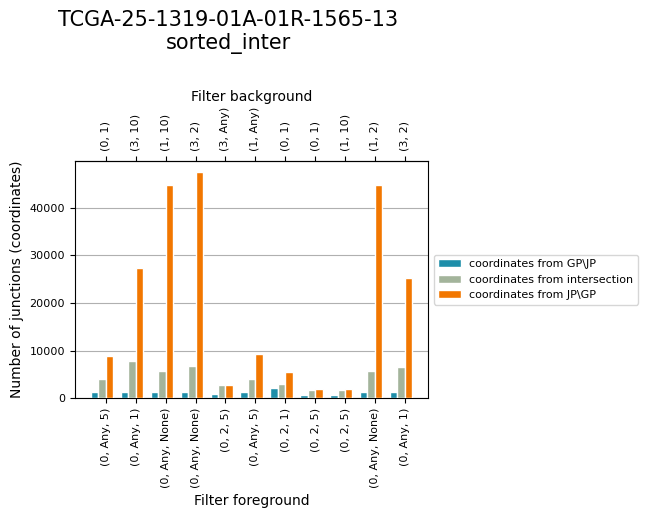

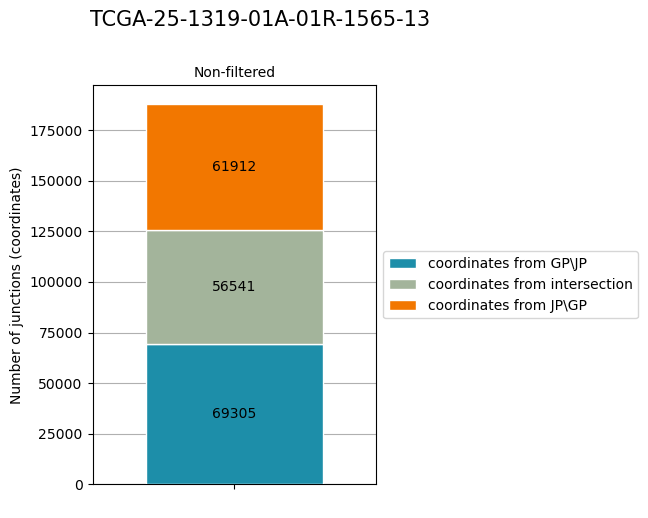

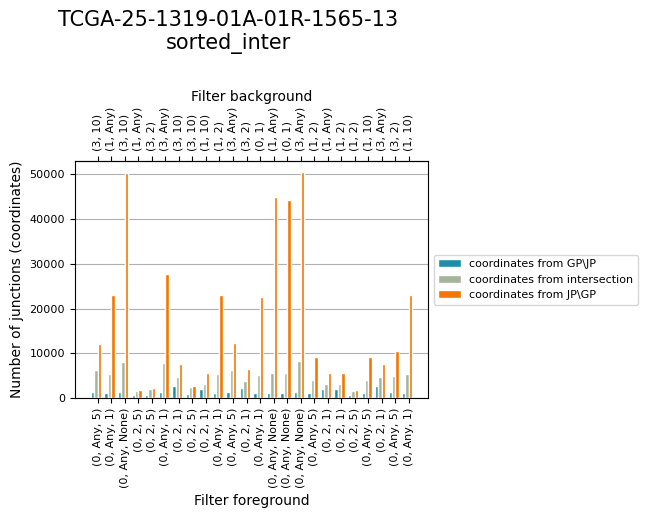

Choose right filter


<Figure size 640x480 with 0 Axes>

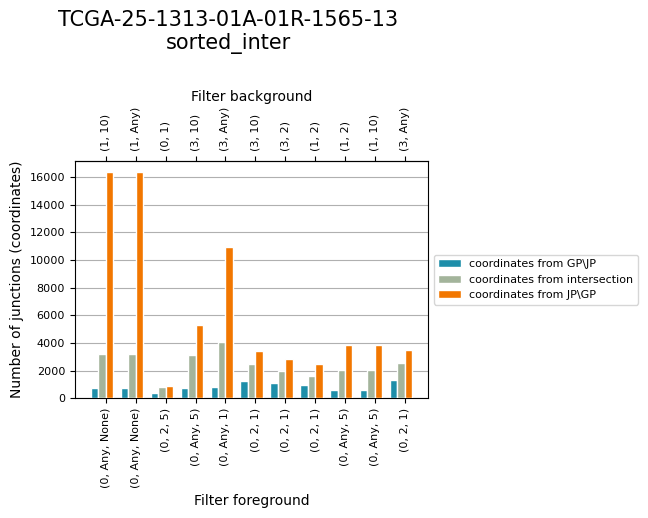

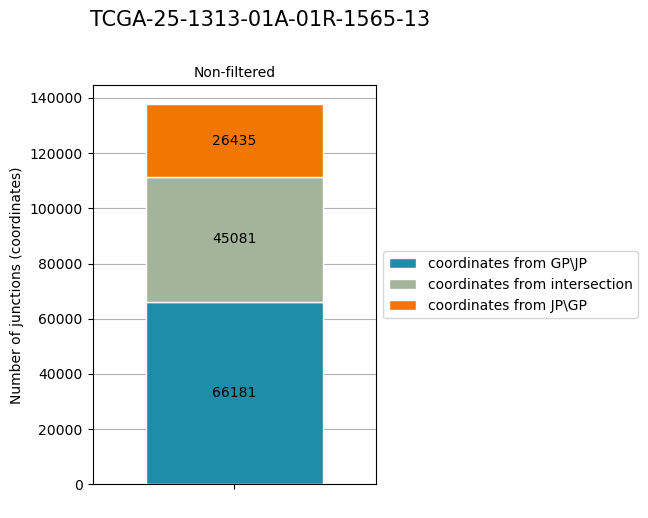

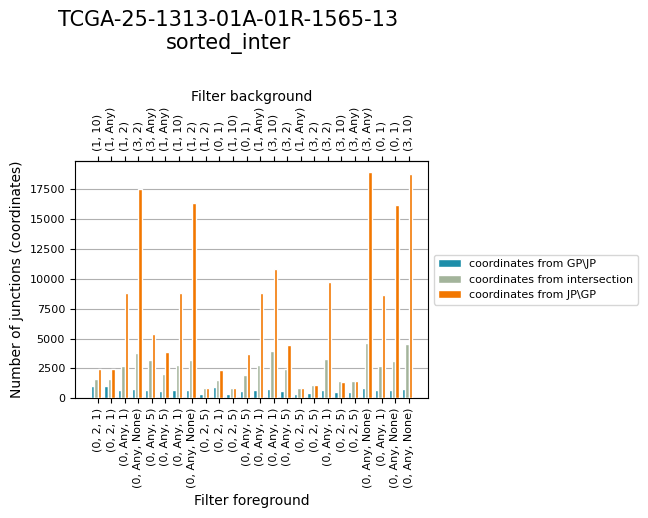

Choose right filter


<Figure size 640x480 with 0 Axes>

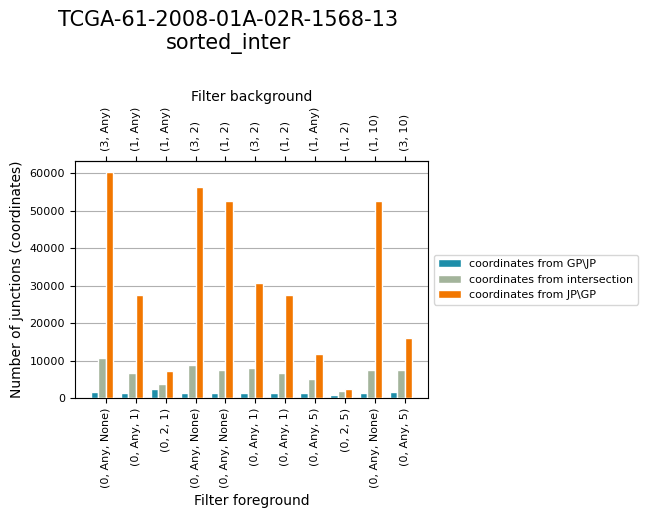

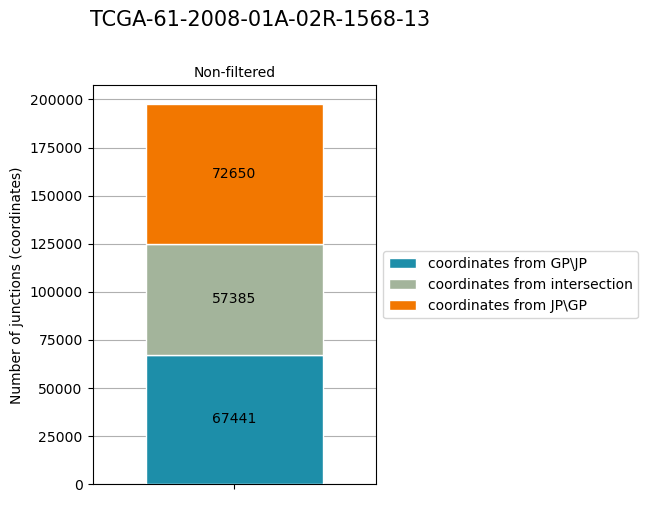

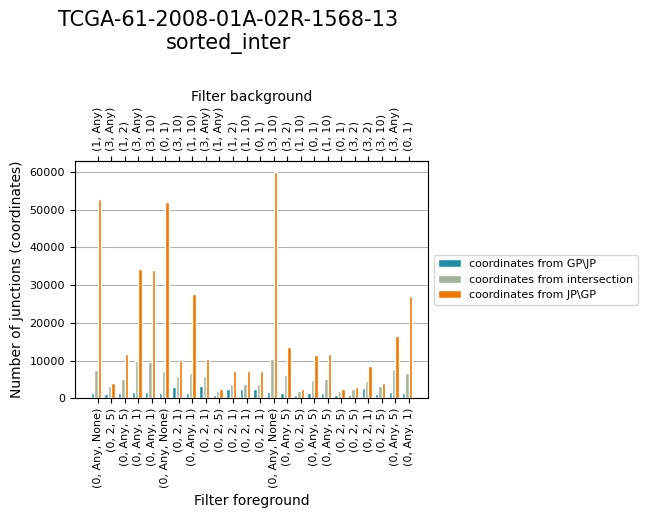

Choose right filter


<Figure size 640x480 with 0 Axes>

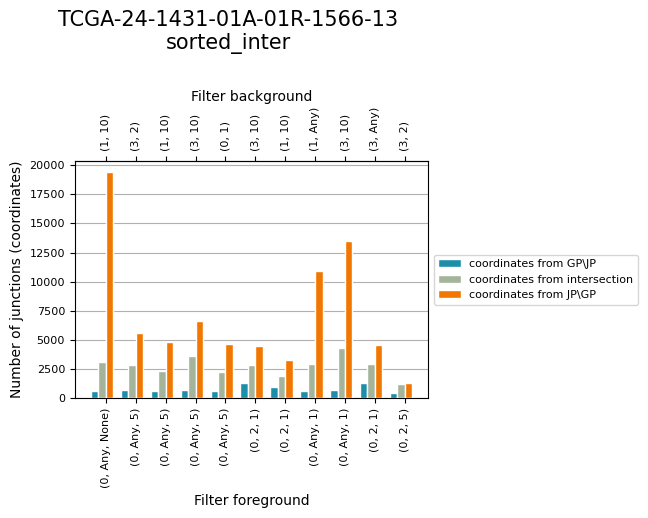

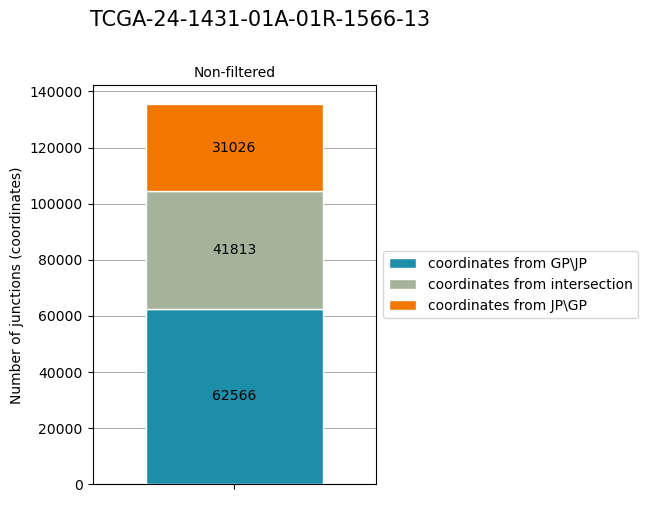

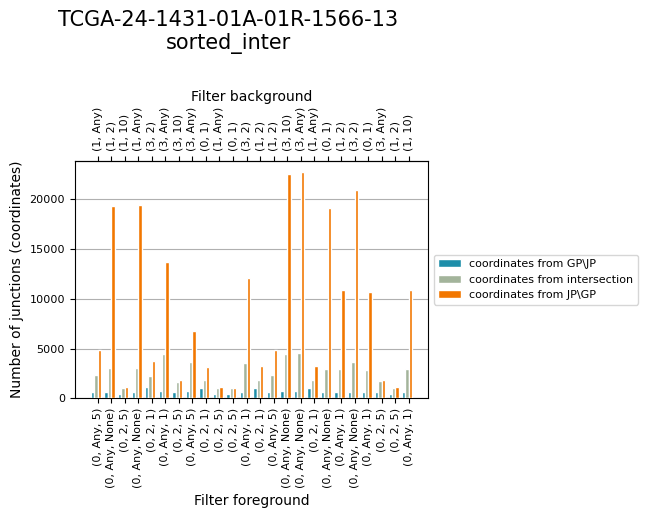

Choose right filter


<Figure size 640x480 with 0 Axes>

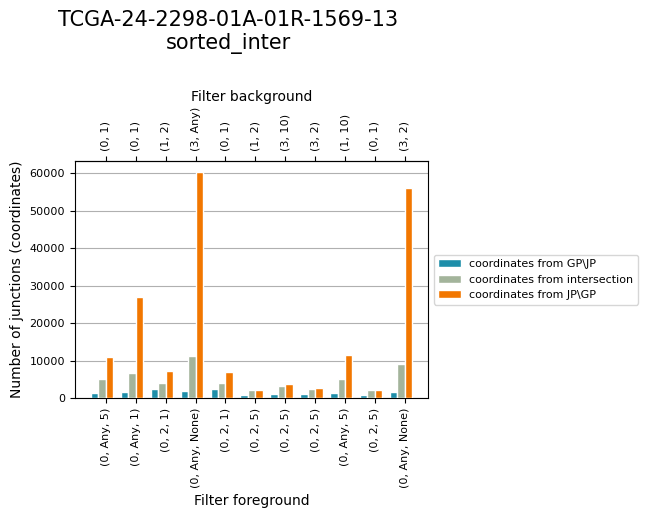

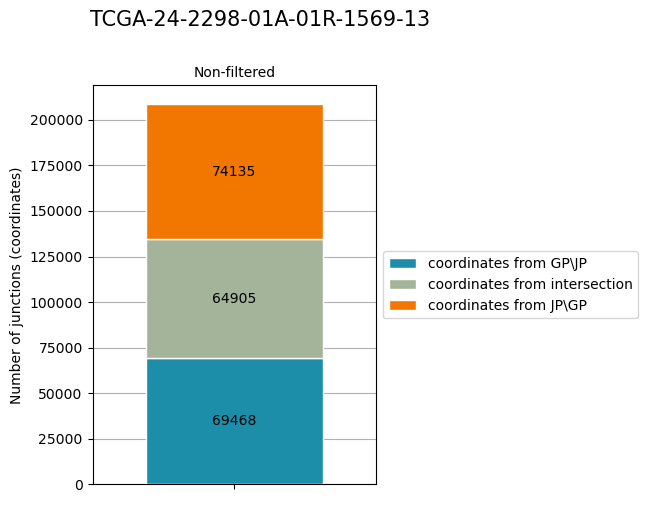

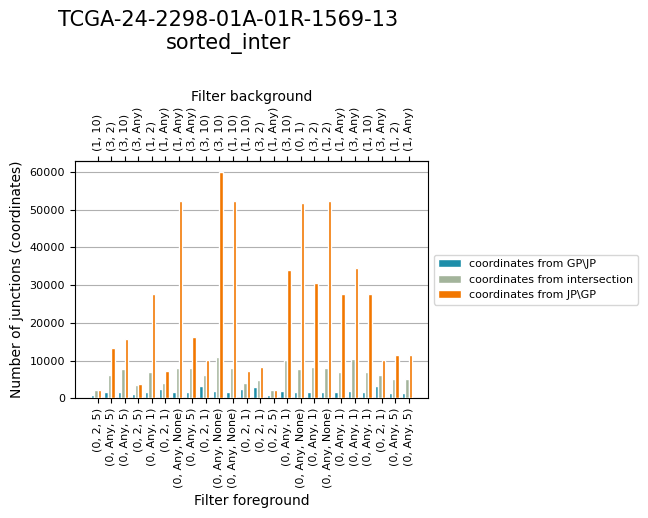

In [36]:
from matplotlib.ticker import ScalarFormatter
# Definition constants     
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.
first_df=out_df_filtered
second_df=out_df_original

final_df = first_df
diff_tab=pd.DataFrame()
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)
    
    data_df_first=data_df.iloc[:data_df['sample'].count()//3]
    data_df_second = data_df.iloc[data_df['sample'].count()//3:]
    
    inter_first=list(data_df_first['size_intersection_coor'])
    s_ETH_first=list(data_df_first['size_eth\ohsu_coor'])
    s_OHSU_first=list(data_df_first['size_ohsu\eth_coor'])
    inter_second=list(data_df_second['size_intersection_coor'])
    s_ETH_second=list(data_df_second['size_eth\ohsu_coor'])
    s_OHSU_second=list(data_df_second['size_ohsu\eth_coor'])
    
    filter_foreground_first = list(data_df_first['filter_foreground'])
    filter_background_first = list(data_df_first['filter_background'])
    filter_foreground_second = list(data_df_second['filter_foreground'])
    filter_background_second = list(data_df_second['filter_background'])
    
    inter2=list(second_df['size_intersection_coor'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu_coor'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth_coor'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']
    
    ## Get data to compare 
    inter2_df=out_df_original['inter_coor'].loc[(out_df_original['sample']==sample)]
    OHSU_2_df=out_df_original['ohsu_coor\eth_coor'].loc[(out_df_original['sample']==sample)]
    ETH_2_df=out_df_original['eth_coor\ohsu_coor'].loc[(out_df_original['sample']==sample)]

    # Get the data for the story of a coordinate
    inter_nf=inter2_df.iloc[0]
    ohsu_nf=OHSU_2_df.iloc[0]
    eth_nf=ETH_2_df.iloc[0]
    
    inter_nf=inter_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
    eth_nf=table_processing.separate_ETH_3exons(eth_nf) # Make a correction on ETH - ISSUE THE intersection non filtered is not fully correct
    OSHU=out_df_filtered['ohsu_coor\eth_coor'].loc[(out_df_filtered['sample']==sample)]
    ETH=out_df_filtered['eth_coor\ohsu_coor'].loc[(out_df_filtered['sample']==sample)]
    
    len_ohsu = [len(ohsu_list) for ohsu_list in OSHU]
    f=final_df.loc[(final_df['sample']==sample)]['filter']

 

    ySalt=''
    
    sample_init = out_df_filtered.loc[out_df_filtered['sample'] == sample]
    l=len(list(sample_init['size_eth\ohsu_coor']))
    filfor = list(sample_init['filter_foreground']) #list(data_df['filter_foreground'])
    filbac = list(sample_init['filter_background']) #list(data_df['filter_background'])
    tab={
         'sample':[],
         'filter':[],
         'JP from Inter NF':[],
         'JP from JP NF':[],
         'GP from Inter NF':[],
         'GP from GP NF':[],
         'JXs JP from Inter NF':[], #LP
         'JXs JP from JP NF':[], #LP
         'JXs GP from Inter NF':[], #LP
         'JXs GP from GP NF':[], #LP
         'ff':filfor,
         'fb':filbac,
         }
       # Conver Aray in DF to DF structure and compare intersection coordinates in filter with intersection coordinates without filter
    for ohsu, filter in zip(OSHU, f):
        ohsu=ohsu.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')

        inter_d=len(inter_d_set:=(set(ohsu) & set(inter_nf)))
        ohsu_d=len(ohsu_d_set:=(set(ohsu) & set(ohsu_nf)))
        ohsu_out=list(set(ohsu).difference(inter_d_set))
        inter_out=list(set(ohsu).difference(ohsu_d_set))
        tab['sample'].append(sample)
        tab['filter'].append(filter)
        tab['JP from Inter NF'].append(inter_d)
        tab['JP from JP NF'].append(ohsu_d)
        tab['JXs JP from Inter NF'].append(inter_d_set) #LP
        tab['JXs JP from JP NF'].append(ohsu_d_set) #LP

        salt=set(ohsu).difference(set(ohsu_nf))
    
    for eth, filter in zip(ETH, f):
        eth=eth.replace('"','').replace("}","").replace("{","").replace("[","").replace("]","").replace("'","").split(', ')
        eth=table_processing.separate_ETH_3exons(eth) # Make a correction on ETH
        inter_d=len(inter_d_set:=(set(eth) & set(inter_nf)))
        eth_d=len(eth_d_set:=(set(eth) & set(eth_nf)))
        eth_out=list(set(eth).difference(inter_d_set))
        inter_out=list(set(eth).difference(eth_d_set))
        tab['GP from Inter NF'].append(inter_d)
        tab['GP from GP NF'].append(eth_d)
        tab['JXs GP from Inter NF'].append(inter_d_set) #LP
        tab['JXs GP from GP NF'].append(eth_d_set) #LP
        salt=set(eth).difference(set(eth_nf))
    tab=pd.DataFrame(tab)
    diff_tab=pd.concat([diff_tab,tab])
    
    fffb1=[]
    for i in range(len(filfor)):
          fffb1.append(filfor[i]+' '+filbac[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])
    
    # Frame structure building
    name = ['coordinates from GP\JP','coordinates from intersection', 'coordinates from JP\GP']
    v_first = [s_ETH_first, inter_first, s_OHSU_first]
    v_second = [s_ETH_second, inter_second, s_OHSU_second]
    axis2 = {
            'coordinates from GP\JP':s_ETH2,
            'coordinates from intersection':inter2,
            'coordinates from JP\GP':s_OHSU2
            }
     
    salt = SALT= PLOT_SORT_BY
    lg_first = len(filter_foreground_first)
    lg_second = len(filter_foreground_second)
    lg2 = len(filfor2)
    #Plotting sample data
    
    x_main_first = filter_foreground_first
    x_secondary_first = filter_background_first
    x_main_second = filter_foreground_second
    x_secondary_second = filter_background_second
    x_secondary2 = filbac2
    
    plt.figure()

    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    bottom2 =np.zeros(lg2)
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    bar_position_ETH2 = range(len(axis2['coordinates from GP\JP']))

    path_sample_absolut_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PNG])
    path_sample_absolut_pdf_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PDF])
    path_sample_absolut_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PNG])
    path_sample_absolut_pdf_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PDF])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filter_foreground_first,x_secondary_first,salt,path_sample_absolut_first,path_sample_absolut_pdf_first)

    # Plot 2  
    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf)

    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filter_foreground_second,x_secondary_second,salt,path_sample_absolut_second,path_sample_absolut_pdf_second)


In [12]:
out_df_filtered.equals(final_df)

out_df_filtered.equals(first_df)

True

In [13]:
final_df.head()

,Unnamed: 0,sample,filter_foreground,filter_background,sum,filter,size_ohsu,size_eth,size_intersection,size_ohsu\eth,...,size_eth_coor,size_intersection_coor,size_ohsu\eth_coor,size_eth\ohsu_coor,eth_coor\inter_coor,ohsu_coor\inter_coor,inter_coor,eth_coor\ohsu_coor,ohsu_coor\eth_coor,priority
0,0,TCGA25131901A01R156513,"(0, Any, 5)","(0, 1)",14147,0A501GA,88503,41552,22489,66014,...,5254,4005,8893,1249,"['113235503:113236600', '107092838:107092934',...","['47227459:47228842', '45104637:45104690', '64...","['30730937:30731069', '11041560:11061893', '22...","['113235503:113236600', '107092838:107092934',...","['47227459:47228842', '45104637:45104690', '64...",NaN
1,1,TCGA25131901A01R156513,"(0, Any, 1)","(3, 10)",36634,0A13XGA,241287,74182,43569,197718,...,9191,7796,27443,1395,"['100353120:100353686', '73964903:73964990', '...","['5528012:5529277', '155319625:155320447', '42...","['37557748:37559380', '17235587:17235693', '15...","['100353120:100353686', '73964903:73964990', '...","['47227459:47228842', '5528012:5529277', '1553...",1.0
2,2,TCGA25131901A01R156513,"(0, Any, None)","(1, 10)",51768,0AN1XGA,349426,53930,33059,316367,...,6991,5739,44777,1252,"['100353120:100353686', '113235503:113236600',...","['238273123:238275823', '5528012:5529277', '15...","['37557748:37559380', '17235587:17235693', '15...","['100353120:100353686', '113235503:113236600',...","['238273123:238275823', '5528012:5529277', '15...",1.0
3,3,TCGA25131901A01R156513,"(0, Any, None)","(3, 2)",55570,0AN32GA,375160,63803,38896,336264,...,8095,6803,47475,1292,"['100353120:100353686', '113235503:113236600',...","['238273123:238275823', '5528012:5529277', '15...","['37557748:37559380', '17235587:17235693', '15...","['100353120:100353686', '113235503:113236600',...","['238273123:238275823', '5528012:5529277', '15...",2.0
4,4,TCGA25131901A01R156513,"(0, 2, 5)","(3, Any)",6587,0253AGA,38262,32447,14184,24078,...,3683,2717,2904,966,"['47638182:47638894', '97432601:97432934', '62...","['44812225:44820971', '118111900:118118035', '...","['30730937:30731069', '228097715:228098840', '...","['47638182:47638894', '97432601:97432934', '62...","['44812225:44820971', '118111900:118118035', '...",0.0


<a name='5'></a>
## Plotting plots with log10

Choose right filter


/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Figure size 640x480 with 0 Axes>

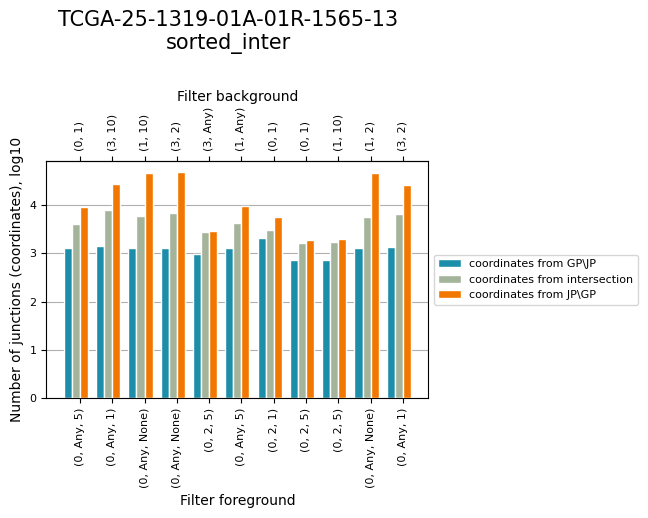

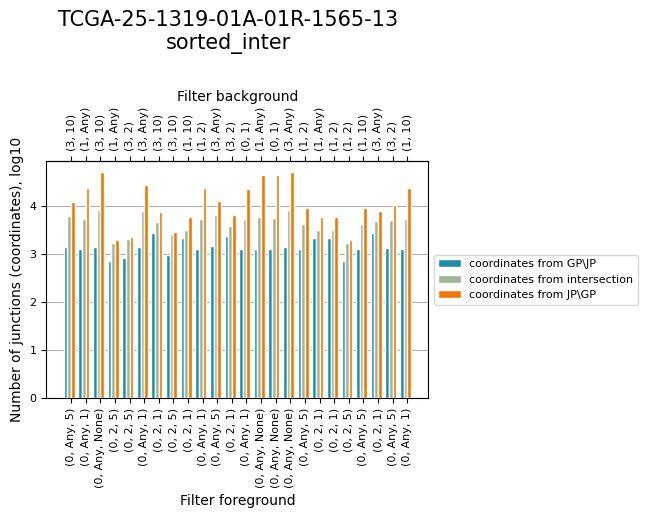

Choose right filter


/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Figure size 640x480 with 0 Axes>

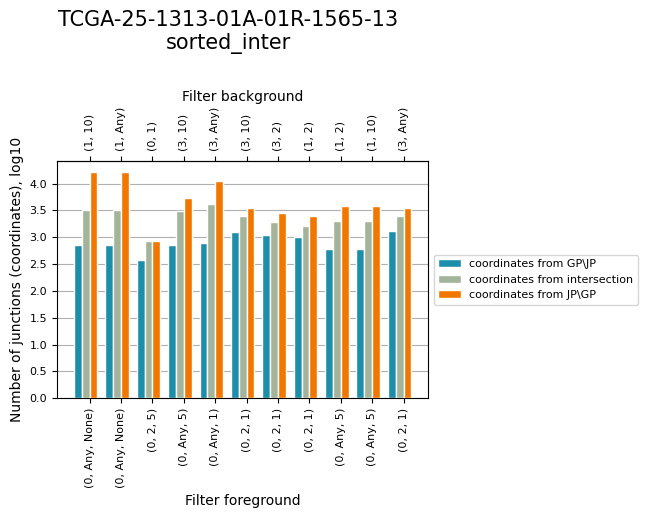

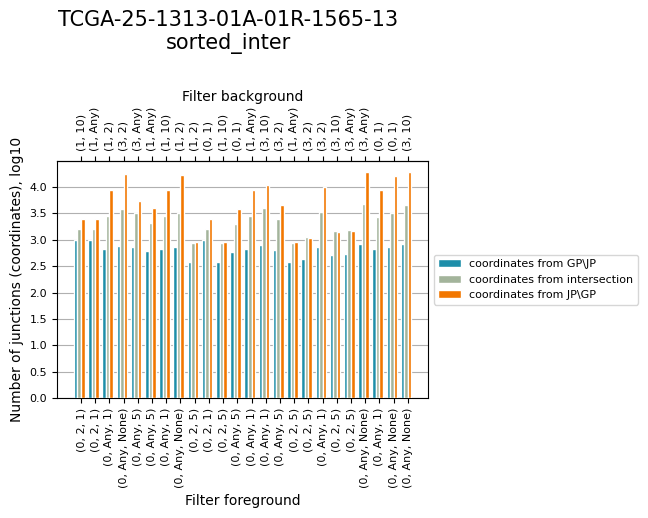

Choose right filter


/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Figure size 640x480 with 0 Axes>

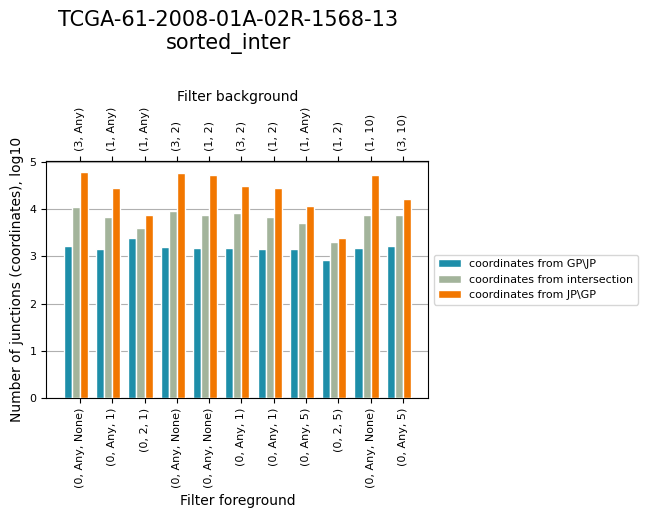

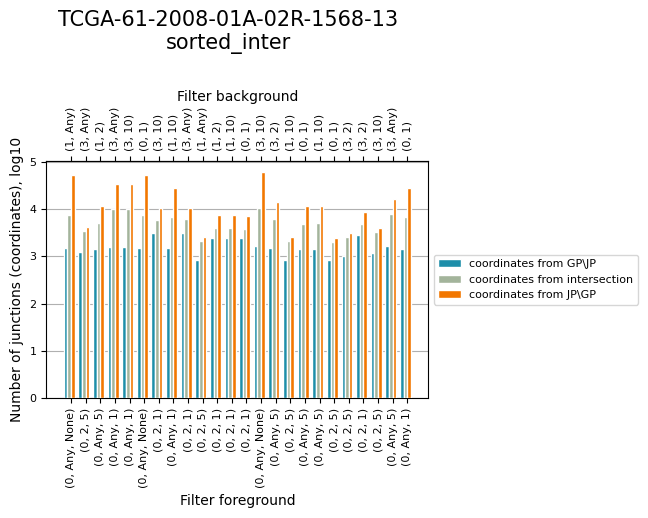

Choose right filter


/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Figure size 640x480 with 0 Axes>

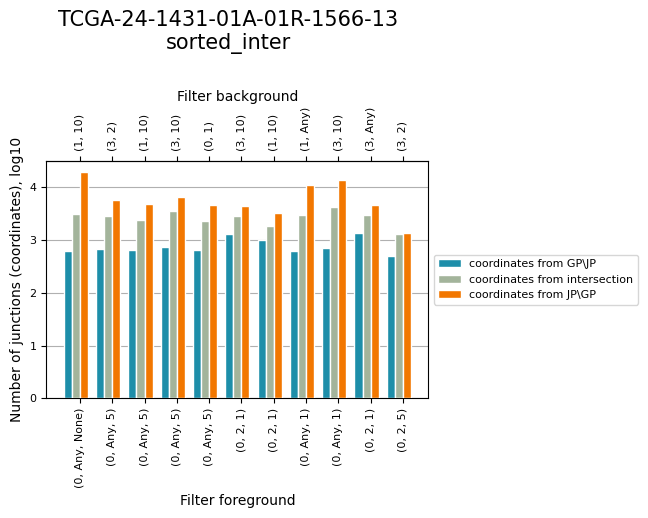

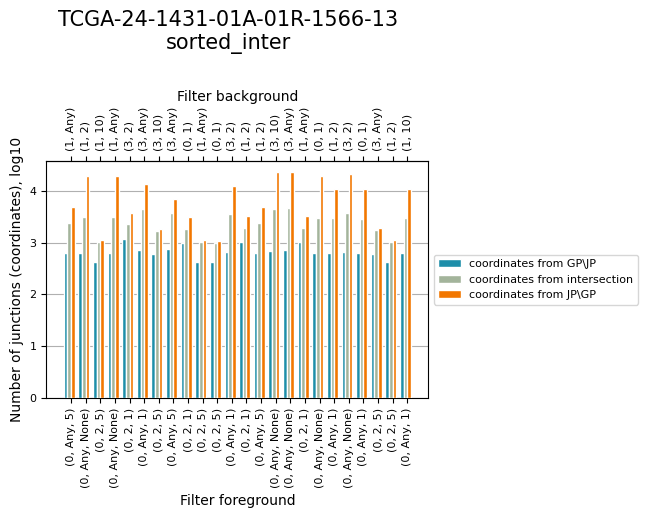

Choose right filter


/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
/scratch/slurm-job.5149315/ipykernel_1959185/2852739341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Figure size 640x480 with 0 Axes>

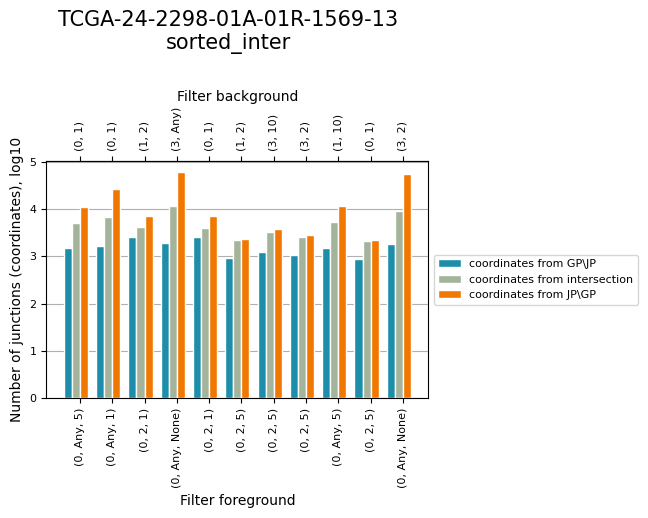

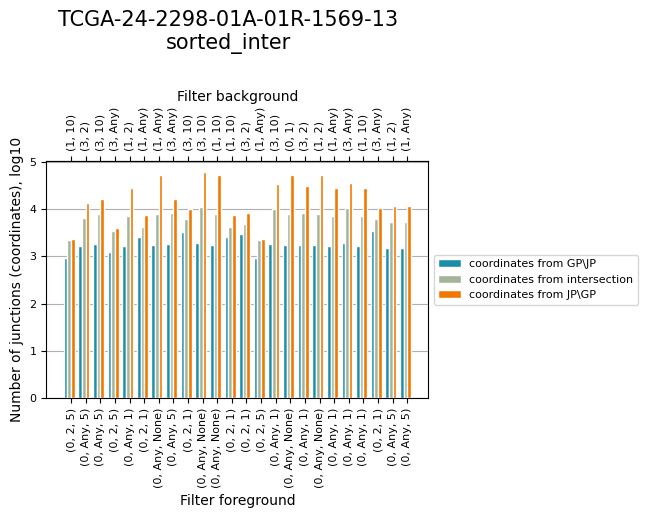

In [14]:
# WITH LOGARITHM
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size':4})      
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df
# Processing data and drawing grahs for each sample
for sample in RESTRICTS_OVARIAN:
    # Download colums from tables
    data_df = final_df.loc[(final_df['sample']==sample)]
    data_df=table_processing.sorting(data_df)

    data_df['size_intersection_coor_lg']=np.log10(data_df['size_intersection_coor'])
    data_df['size_eth\ohsu_coor_lg']=np.log10(data_df['size_eth\ohsu_coor'])
    data_df['size_ohsu\eth_coor_lg']=np.log10(data_df['size_ohsu\eth_coor'])
    
    data_first=data_df.iloc[:data_df['sample'].count()//3]
    data_second = data_df.iloc[data_df['sample'].count()//3:]
    
    inter_first=list(data_first['size_intersection_coor_lg'])
    s_ETH_first=list(data_first['size_eth\ohsu_coor_lg'])
    s_OHSU_first=list(data_first['size_ohsu\eth_coor_lg'])

    inter_second=list(data_second['size_intersection_coor_lg'])
    s_ETH_second=list(data_second['size_eth\ohsu_coor_lg'])
    s_OHSU_second=list(data_second['size_ohsu\eth_coor_lg'])

    
    filfor_first = list(data_first['filter_foreground'])
    filbac_first = list(data_first['filter_background'])

    filfor_second = list(data_second['filter_foreground'])
    filbac_second = list(data_second['filter_background'])



    ySalt=", log10"
    salt=PLOT_SORT_BY

      

   
    # Frame structure building
    name=['coordinates from GP\JP','coordinates from intersection','coordinates from JP\GP']
    v_first=[s_ETH_first,inter_first,s_OHSU_first]
    v_second=[s_ETH_second,inter_second,s_OHSU_second]

    
    lg_first = len(filfor_first)
    lg_second= len(filfor_second)
    #Plotting sample data
    x_main_first = filfor_first
    x_secondary_first = filbac_first
    x_main_second = filfor_second
    x_secondary_second = filbac_second
    

    bottom_first =np.zeros(lg_first)
    bottom_second = np.zeros(lg_second)
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    
    path_sample_absolut_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE,LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PNG])
    path_sample_absolut_pdf_first =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE,LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'1'+PDF])
    path_sample_absolut_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE,LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PNG])
    path_sample_absolut_pdf_second =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'coordinates', SALT,PLOT_TYPE,LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY+'2'+PDF])
    plt.figure()
    ### FIRST PART OF PLOT
    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_absolut_first,path_sample_absolut_pdf_first,ySalt=ySalt)
    
    ### SECOND PART OF PLOT
    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_absolut_second,path_sample_absolut_pdf_second,ySalt=ySalt)
 

<a name='6'></a>
## Story of coordinates

Data Filtering and Selection:
The code is filtering and selecting specific rows from dataframes based on a sample identifier. This is common in bioinformatics when dealing with sample-specific data.
Data Cleaning and Transformation:
It includes a series of string replacement operations to clean and standardize the data in specific columns. Such operations are typical when preparing data for comparative analysis or when the data includes extraneous characters or formatting issues.
Set Operations for Data Analysis:
The code performs set operations (like intersection and difference) on lists converted from dataframe columns. This suggests it is comparing datasets to find common or unique elements, which is a common analytical method for genomic or proteomic data.
Printing Results:
It prints out lengths of sets and their differences, which might be used to understand the overlap and uniqueness between the datasets. This step could be part of an exploratory data analysis to summarize the characteristics of the data.

In [15]:
filter_df=out_df_filtered.loc[(out_df_filtered['sample']=='TCGA25131901A01R156513')]
original_df=out_df_original.loc[(out_df_original['sample']=='TCGA25131901A01R156513')]
OSHU=filter_df['ohsu_coor\eth_coor']
ETH=filter_df['eth_coor\ohsu_coor']
inter2_df=original_df['inter_coor']
OHSU_2_df=original_df['ohsu_coor\eth_coor']
ETH_2_df=original_df['eth_coor\ohsu_coor']
inter_nf=inter2_df.iloc[0]
ohsu_nf=OHSU_2_df.iloc[0]
eth_nf=ETH_2_df.iloc[0]

inter_nf=inter_nf.replace('"','').replace("[","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
ohsu_nf=ohsu_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
eth_nf=eth_nf.replace('"','').replace("{","").replace("}","").replace("[","").replace("]","").replace("'","").split(', ')
len_ohsu = [ohsu_list.replace('"','').replace("[","").replace("]","").replace("{","").replace("}","").replace("'","").split(', ') for ohsu_list in OSHU]
len_eth = [eth_list.replace('"','').replace("[","").replace("]","").replace("{","").replace("}","").replace("'","").split(', ') for eth_list in ETH]
for ohsu in len_ohsu:
    lll=set(ohsu).difference(set(ohsu_nf))
    print(len(lll.difference(set(inter_nf))))
    print(f"len ohsu {len(ohsu)},\tfrom OHSU NF {len(set(ohsu) & set(ohsu_nf))},\tfrom INTER NF {len(set(ohsu) & set(inter_nf))},\tfrom ETH NF {len(set(ohsu) & set(eth_nf))}")
print(TT)
for eth in len_eth:
    print(f"len eth {len(eth)},\tfrom OHSU NF {len(set(eth) & set(ohsu_nf))},\tfrom INTER NF {len(set(eth) & set(inter_nf))},\tfrom ETH NF {len(set(eth) & set(eth_nf))}")

0
len ohsu 8893,	from OHSU NF 8817,	from INTER NF 76,	from ETH NF 0
0
len ohsu 27443,	from OHSU NF 27233,	from INTER NF 210,	from ETH NF 0
0
len ohsu 44777,	from OHSU NF 44685,	from INTER NF 92,	from ETH NF 0
0
len ohsu 47475,	from OHSU NF 47358,	from INTER NF 117,	from ETH NF 0
0
len ohsu 2904,	from OHSU NF 2803,	from INTER NF 101,	from ETH NF 0
0
len ohsu 9215,	from OHSU NF 9132,	from INTER NF 83,	from ETH NF 0
0
len ohsu 5591,	from OHSU NF 5529,	from INTER NF 62,	from ETH NF 0
0
len ohsu 1871,	from OHSU NF 1841,	from INTER NF 30,	from ETH NF 0
0
len ohsu 1950,	from OHSU NF 1916,	from INTER NF 34,	from ETH NF 0
0
len ohsu 44729,	from OHSU NF 44640,	from INTER NF 89,	from ETH NF 0
0
len ohsu 25203,	from OHSU NF 25089,	from INTER NF 114,	from ETH NF 0
0
len ohsu 12214,	from OHSU NF 12028,	from INTER NF 186,	from ETH NF 0
0
len ohsu 23004,	from OHSU NF 22913,	from INTER NF 91,	from ETH NF 0
0
len ohsu 50094,	from OHSU NF 49879,	from INTER NF 215,	from ETH NF 0
0
len ohsu 1950,	from OHSU

<a name='3'></a>
## Building plots for story of coordinates

Unique Sample Identification:
The code starts by identifying unique samples within a dataset, likely to ensure that the analysis is conducted on distinct data points.
Data Extraction and Sorting:
It extracts data for each sample and performs some sorting using custom functions, likely to prepare the data for comparison or further analysis.
Filter Application:
Filters are applied to the data, which might be conditions or criteria used to select specific data subsets. Filtering is a common preprocessing step to narrow down the data to relevant information for the analysis.
Column Mapping:
New variables are created to store specific data columns. This is often done to simplify the code and make the data easier to work with during analysis and plotting.
Bar Plot Positioning:
The code calculates positions for bar plots, which is a necessary step for plotting categorical data in bar charts.
Path Generation for Saving Plots:
Paths are created for saving the plots, suggesting that the visualization results will be stored as files, likely for reporting or further examination.
Plotting Functions:
Custom plotting functions are called to generate the visualizations. These functions likely take the prepared data and plot them according to the specified parameters for visual analysis.
Plot Generation:
The script prepares for the generation of bar plots by defining their positions and passes the relevant data to plotting functions.

In [48]:
path_track = os.path.join(SAVE_DIR, "DATA", "OVARIAN", "TABLES", "compare_filtering_NF_OVARIAN.csv") #LP
diff_tab.reset_index(drop = True).to_csv(path_track, index = None, sep='\t') #LP

In [37]:
display(diff_tab.head())
print(diff_tab.shape)

,sample,filter,JP from Inter NF,JP from JP NF,GP from Inter NF,GP from GP NF,JXs JP from Inter NF,JXs JP from JP NF,JXs GP from Inter NF,JXs GP from GP NF,ff,fb
0,TCGA25131901A01R156513,0A501GA,76,8817,510,739,"{44813454:44819345, 53228131:53240255, 5481008...","{30338876:30346441, 39630003:39634028, 2166605...","{48468217:48469360, 67025000:67030505, 1740453...","{207761446:207767012, 6347735:6347844, 1406684...","(0, Any, 5)","(0, 1)"
1,TCGA25131901A01R156513,0A13XGA,210,27233,304,1090,"{102049519:102049571, 67483174:67483242, 88643...","{122861373:122861432, 216160140:216161996, 288...","{49513996:49514049, 40432862:40437770, 3233466...","{207761446:207767012, 6347735:6347844, 1406684...","(0, Any, 1)","(3, 10)"
2,TCGA25131901A01R156513,0AN1XGA,92,44685,237,1015,"{102049519:102049571, 88643465:88646127, 40265...","{90087169:90088391, 31635408:31635611, 1228613...","{40432862:40437770, 32334668:32334719, 6758524...","{207761446:207767012, 6347735:6347844, 1406684...","(0, Any, None)","(1, 10)"
3,TCGA25131901A01R156513,0AN32GA,117,47358,236,1056,"{67483174:67483242, 88643465:88646127, 4026514...","{90087169:90088391, 31635408:31635611, 1228613...","{40432862:40437770, 32334668:32334719, 6758524...","{207761446:207767012, 6347735:6347844, 1406684...","(0, Any, None)","(3, 2)"
4,TCGA25131901A01R156513,0253AGA,101,2803,625,340,"{88643465:88646127, 73518609:73518772, 2195055...","{71819510:71819721, 144791299:144791772, 35279...","{42376576:42376624, 30723361:30723495, 1740414...","{207761446:207767012, 54850455:54850623, 17295...","(0, 2, 5)","(3, Any)"


(175, 12)


In [28]:
display(samples_table.head())
print(samples_table.shape)

,sample,filter,JP from Inter NF,JP from JP NF,GP from Inter NF,GP from GP NF,ff,fb,foreground_pattern,background_pattern,leniency_background,leniency_foreground
0,TCGA24229801A01R156913,0A501GA,140,10911,613,885,"(0, Any, 5)","(0, 1)",0A5,01,0.0,2.0
1,TCGA24229801A01R156913,0A101GA,164,26936,489,1185,"(0, Any, 1)","(0, 1)",0A1,01,0.0,3.0
2,TCGA24229801A01R156913,02112GA,119,7168,1698,867,"(0, 2, 1)","(1, 2)",021,12,1.0,1.0
3,TCGA24229801A01R156913,0AN3AGA,339,60046,369,1524,"(0, Any, None)","(3, Any)",0AN,3A,6.0,4.0
4,TCGA24229801A01R156913,02101GA,113,6971,1660,860,"(0, 2, 1)","(0, 1)",021,01,0.0,1.0


(35, 12)


In [25]:
display(table_JP.head())
print(table_JP.shape)

,sample,filter,JP from Inter NF,JP from JP NF,GP from Inter NF,GP from GP NF,ff,fb,foreground_pattern,background_pattern,leniency_background,leniency_foreground,index,filter_foreground_target,filter_foreground_reads,filter_foreground_samples,filter_background_reads,filter_background_samples,filter_background,filter_foreground
9,TCGA24229801A01R156913,02501GA,64,2172,552,346,"(0, 2, 5)","(0, 1)",025,01,0.0,0.0,0,0,2,5,0,1,"(0, 1)","(0, 2, 5)"
5,TCGA24229801A01R156913,02512GA,71,2245,568,349,"(0, 2, 5)","(1, 2)",025,12,1.0,0.0,1,0,2,5,1,2,"(1, 2)","(0, 2, 5)"
11,TCGA24229801A01R156913,0251XGA,73,2258,570,349,"(0, 2, 5)","(1, 10)",025,1X,2.0,0.0,2,0,2,5,1,X,"(1, X)","(0, 2, 5)"
24,TCGA24229801A01R156913,0251AGA,73,2258,570,349,"(0, 2, 5)","(1, Any)",025,1A,3.0,0.0,3,0,2,5,1,A,"(1, A)","(0, 2, 5)"
7,TCGA24229801A01R156913,02532GA,91,2712,660,382,"(0, 2, 5)","(3, 2)",025,32,4.0,0.0,4,0,2,5,3,2,"(3, 2)","(0, 2, 5)"


(35, 20)


In [27]:
display(table_GP.head())
print(table_GP.shape)

,sample,filter,JP from Inter NF,JP from JP NF,GP from Inter NF,GP from GP NF,ff,fb,foreground_pattern,background_pattern,leniency_background,leniency_foreground,index,filter_foreground_target,filter_foreground_reads,filter_foreground_samples,filter_background_reads,filter_background_samples,filter_background,filter_foreground
9,TCGA24229801A01R156913,02501GA,64,2172,552,346,"(0, 2, 5)","(0, 1)",025,01,0.0,0.0,0,0,2,5,0,1,"(0, 1)","(0, 2, 5)"
5,TCGA24229801A01R156913,02512GA,71,2245,568,349,"(0, 2, 5)","(1, 2)",025,12,1.0,0.0,1,0,2,5,1,2,"(1, 2)","(0, 2, 5)"
11,TCGA24229801A01R156913,0251XGA,73,2258,570,349,"(0, 2, 5)","(1, 10)",025,1X,2.0,0.0,2,0,2,5,1,X,"(1, X)","(0, 2, 5)"
24,TCGA24229801A01R156913,0251AGA,73,2258,570,349,"(0, 2, 5)","(1, Any)",025,1A,3.0,0.0,3,0,2,5,1,A,"(1, A)","(0, 2, 5)"
7,TCGA24229801A01R156913,02532GA,91,2712,660,382,"(0, 2, 5)","(3, 2)",025,32,4.0,0.0,4,0,2,5,3,2,"(3, 2)","(0, 2, 5)"


(35, 20)


/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

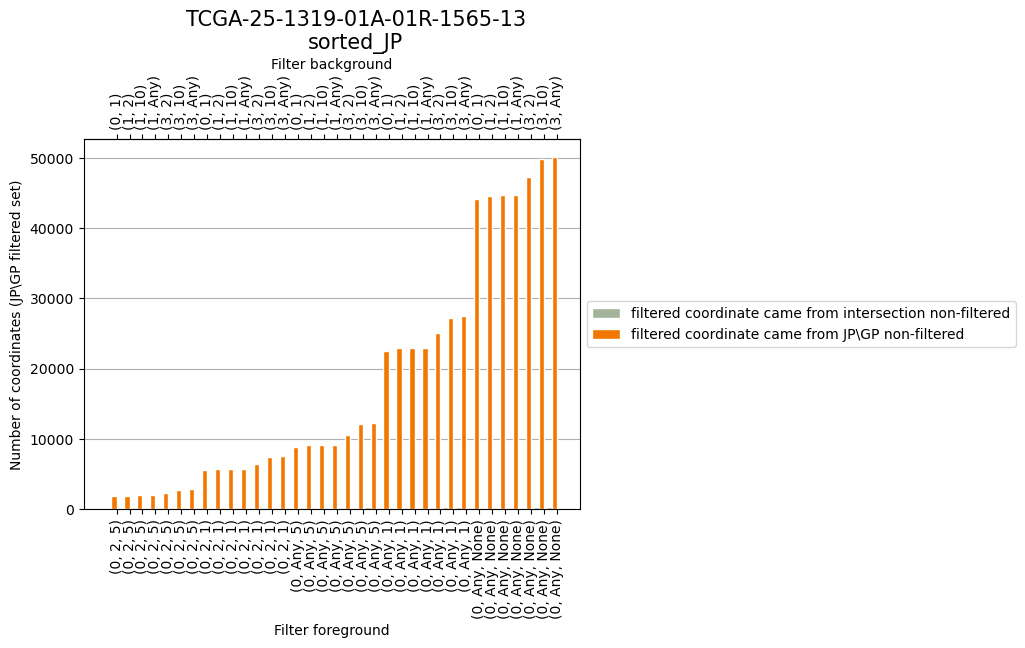

<Figure size 1600x1000 with 0 Axes>

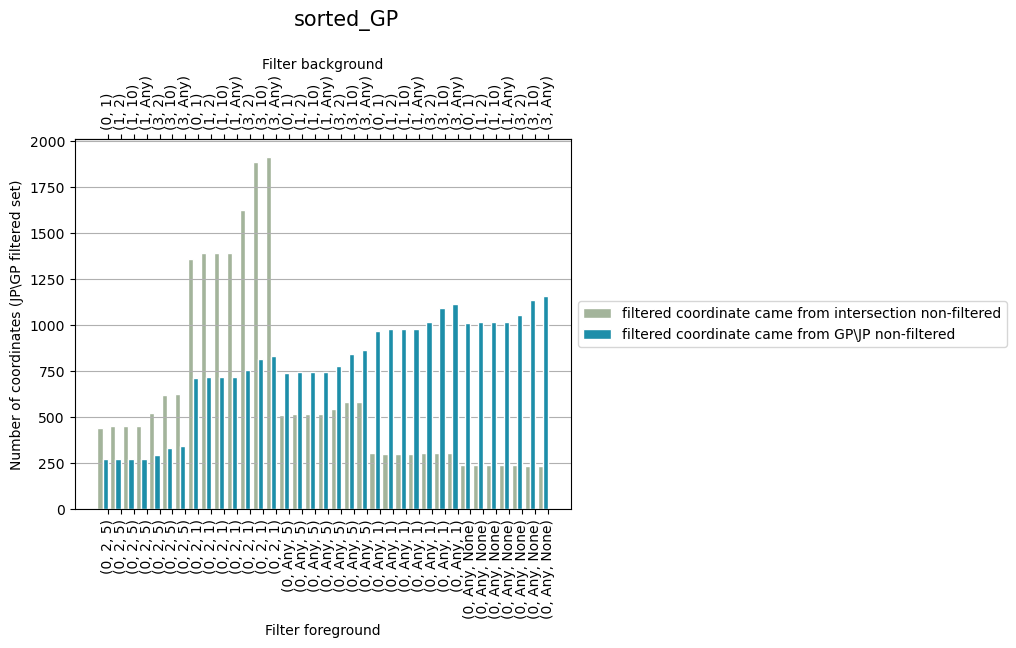

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

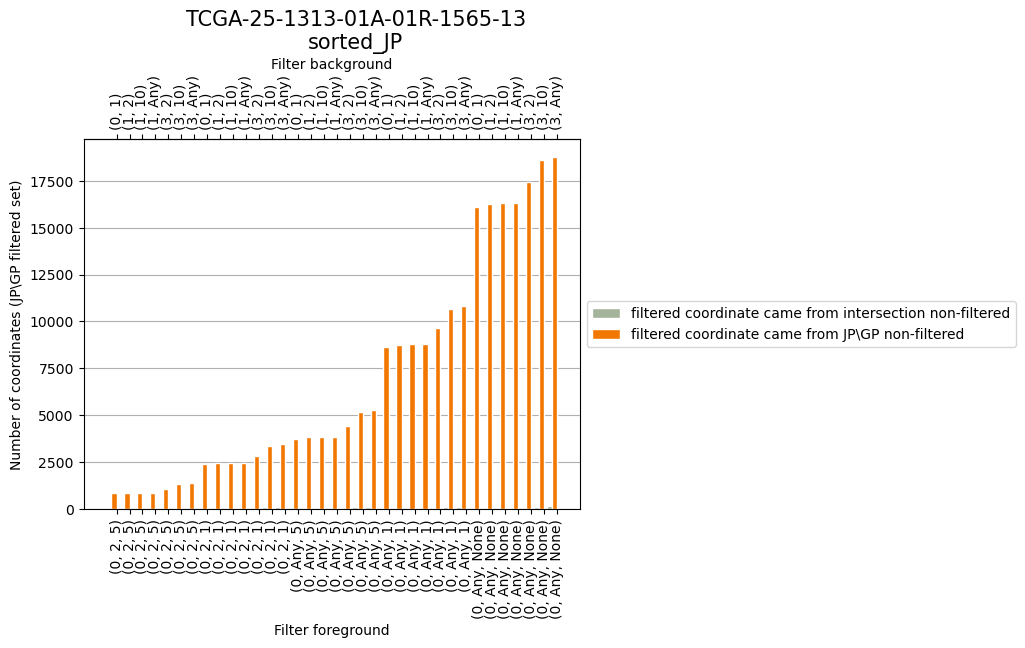

<Figure size 1600x1000 with 0 Axes>

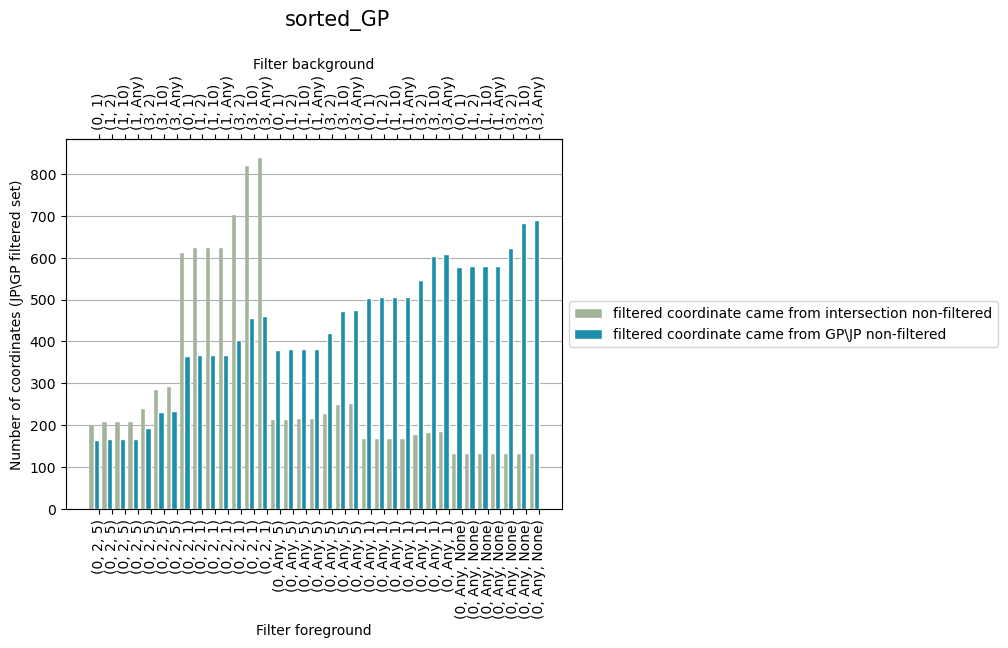

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

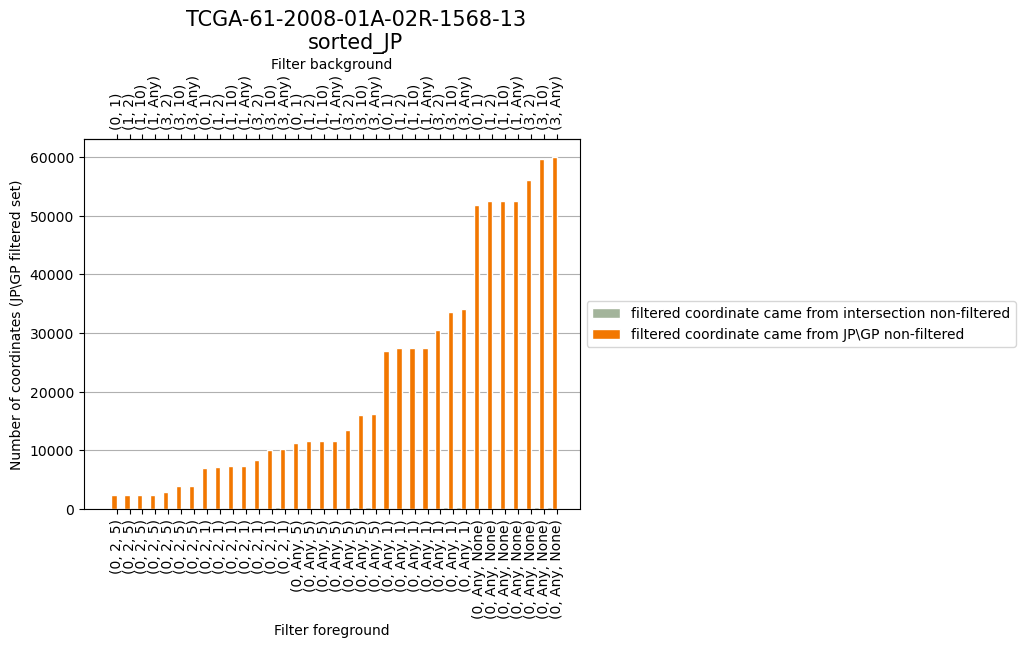

<Figure size 1600x1000 with 0 Axes>

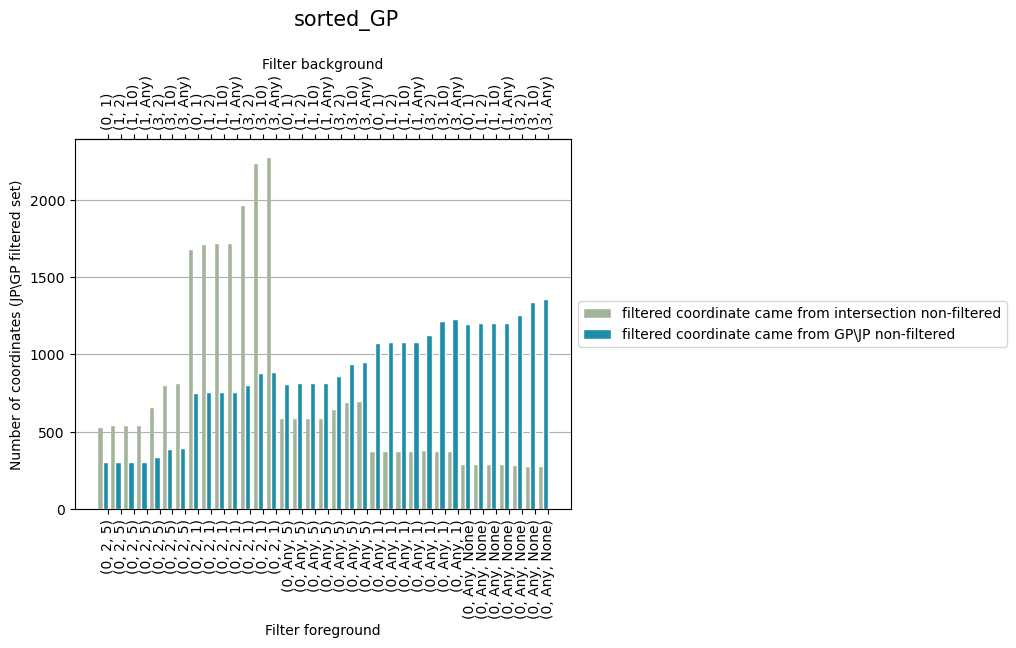

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

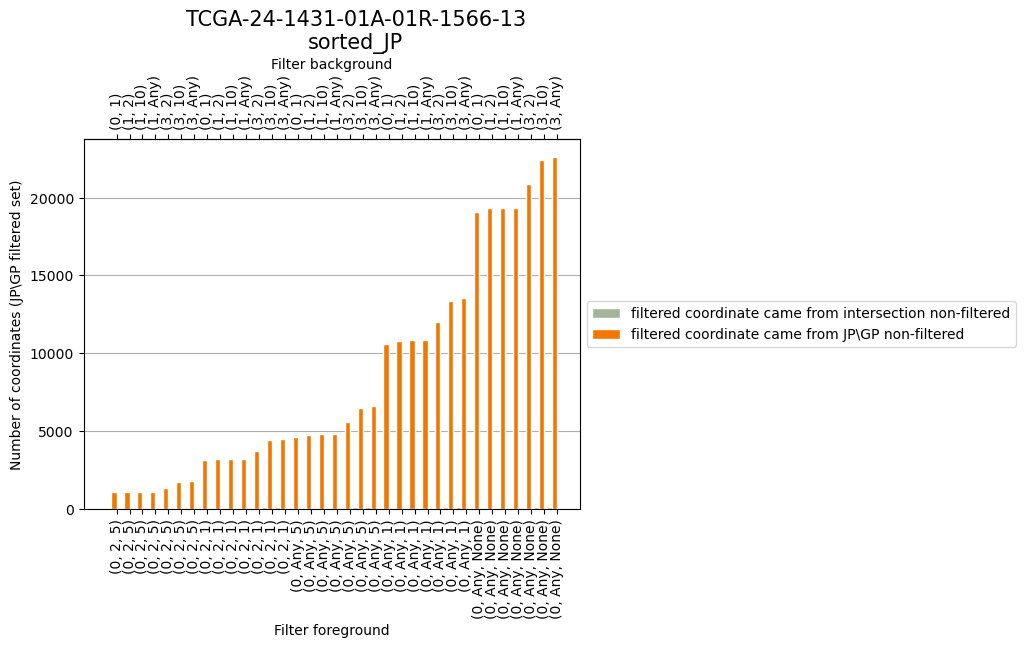

<Figure size 1600x1000 with 0 Axes>

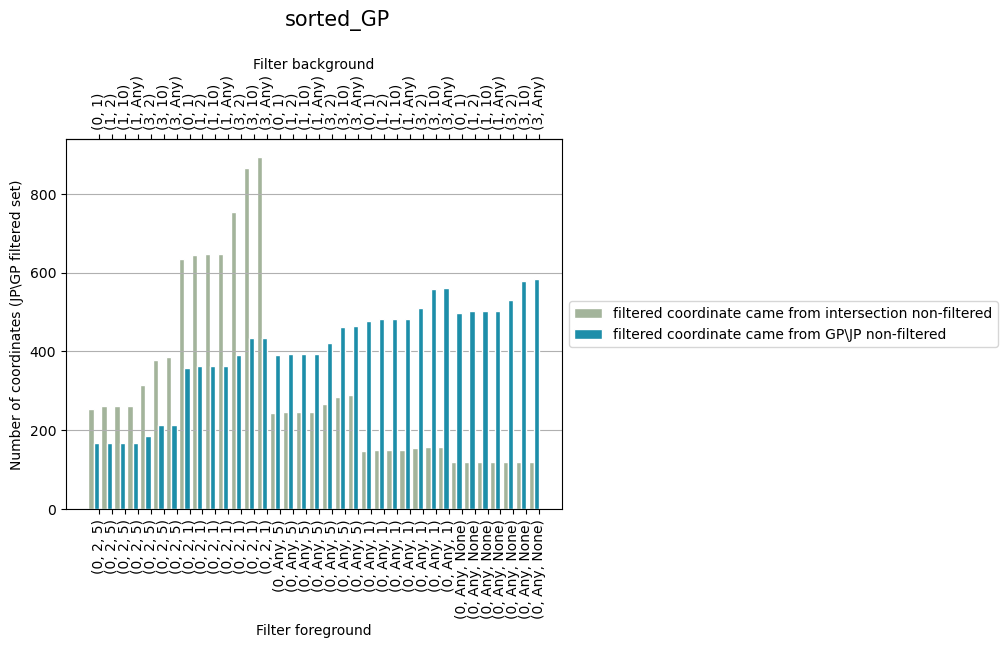

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

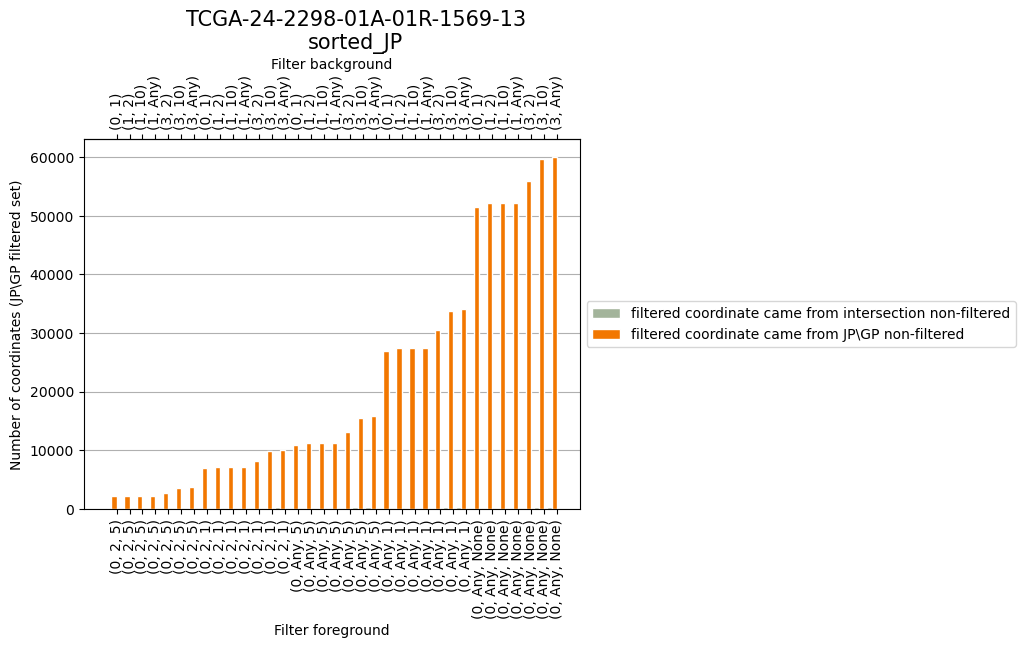

<Figure size 1600x1000 with 0 Axes>

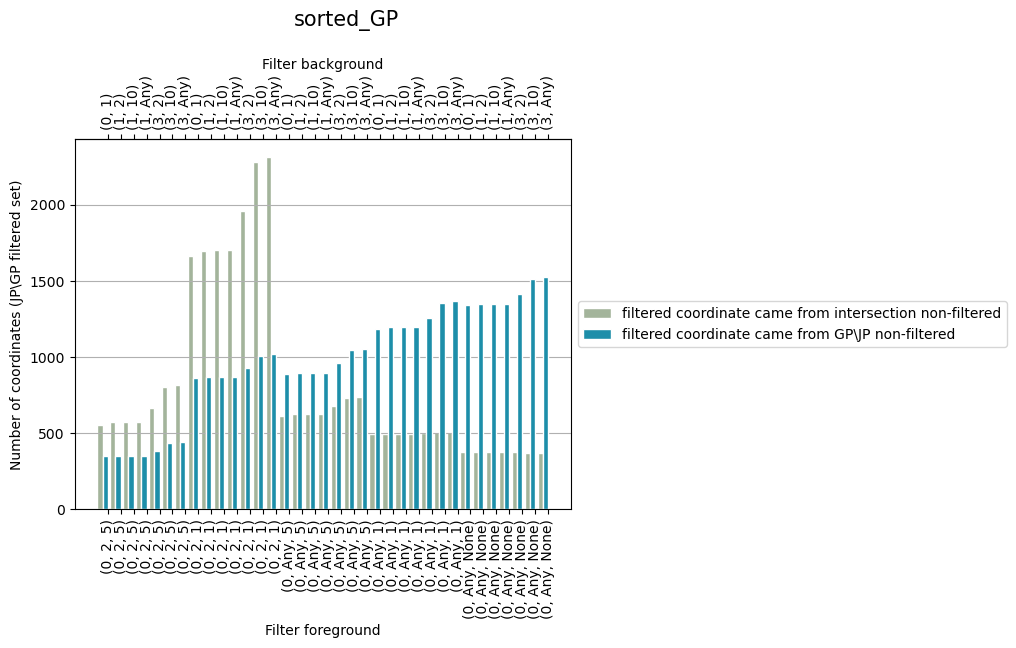

In [16]:
restricts = diff_tab['sample'].unique()
for sample in RESTRICTS_OVARIAN:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]

    
    table_JP=samples_table 
    table_GP=samples_table 
#     table_JP=table_processing.sorting_JP(table_JP)
#     table_GP=table_processing.sorting_GP(table_GP)
    table_JP = table_processing.sort_filters(table_JP, order_background, order_foreground)
    table_GP = table_processing.sort_filters(table_GP, order_background, order_foreground)

    
    FILTER_JP=table_JP['filter']
    FILTER_GP=table_GP['filter']

    
    JP_INTER_NF=table_JP['JP from Inter NF']
    JP_JP_NF=table_JP['JP from JP NF']
    GP_INTER_NF=table_GP['GP from Inter NF']
    GP_GP_NF=table_GP['GP from GP NF']

    
    FF_JP=table_JP['ff']
    FB_JP=table_JP['fb']
    FF_GP=table_GP['ff']
    FB_GP=table_GP['fb']

    
    bar_position_JP=range(len(FF_JP))
    bar_position_GP=range(len(FF_GP))

    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,PLOT_JP_SORT_BY,LOGTHM, sample + '_' + NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,PLOT_JP_SORT_BY,LOGTHM,sample + '_' +  NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,PLOT_GP_SORT_BY,LOGTHM, sample + '_' + NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',PLOT_TYPE,PLOT_GP_SORT_BY,LOGTHM, sample + '_' + NAME_PLOT_GP+PDF])

    plt.figure()
    draw_plot.plotting_JP_GP(FILTER_JP,JP_INTER_NF,JP_JP_NF,sample,bar_position_JP,FF_JP,FB_JP,path_sample_JP,path_sample_JP_pdf)
    draw_plot.plotting_JP_GP(FILTER_GP,GP_INTER_NF,GP_GP_NF,sample,bar_position_GP,FF_GP,FB_GP,path_sample_GP,path_sample_GP_pdf,JP=False)
 

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 1600x1000 with 0 Axes>

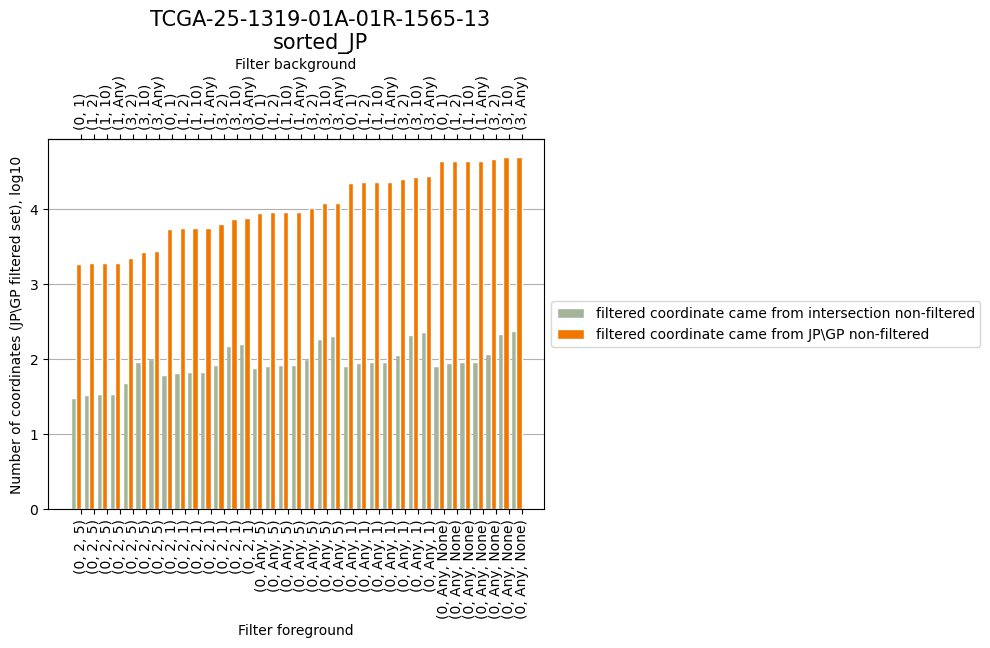

<Figure size 1600x1000 with 0 Axes>

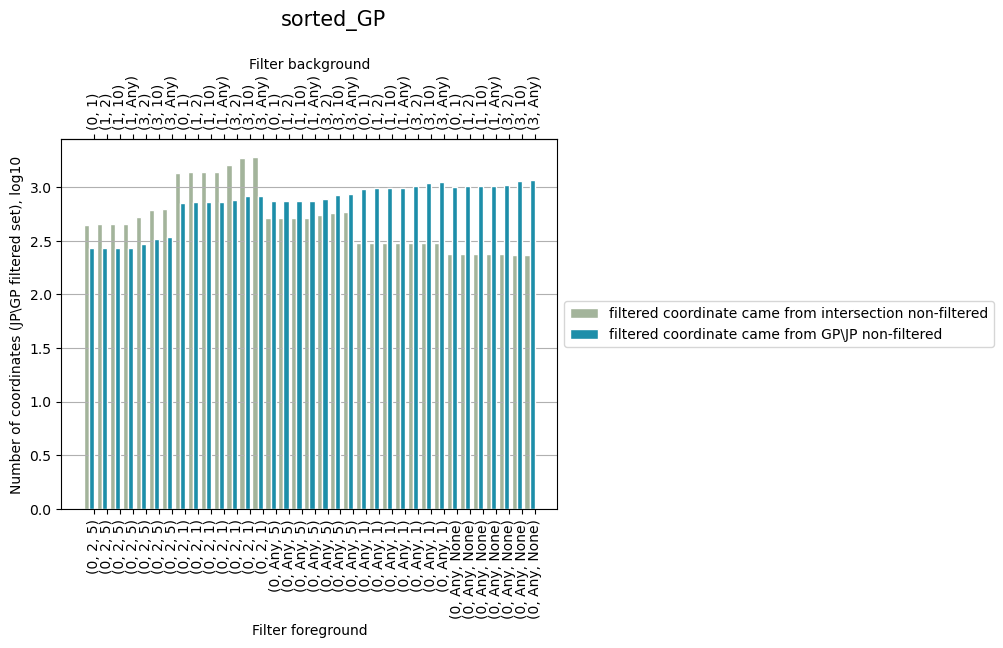

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 1600x1000 with 0 Axes>

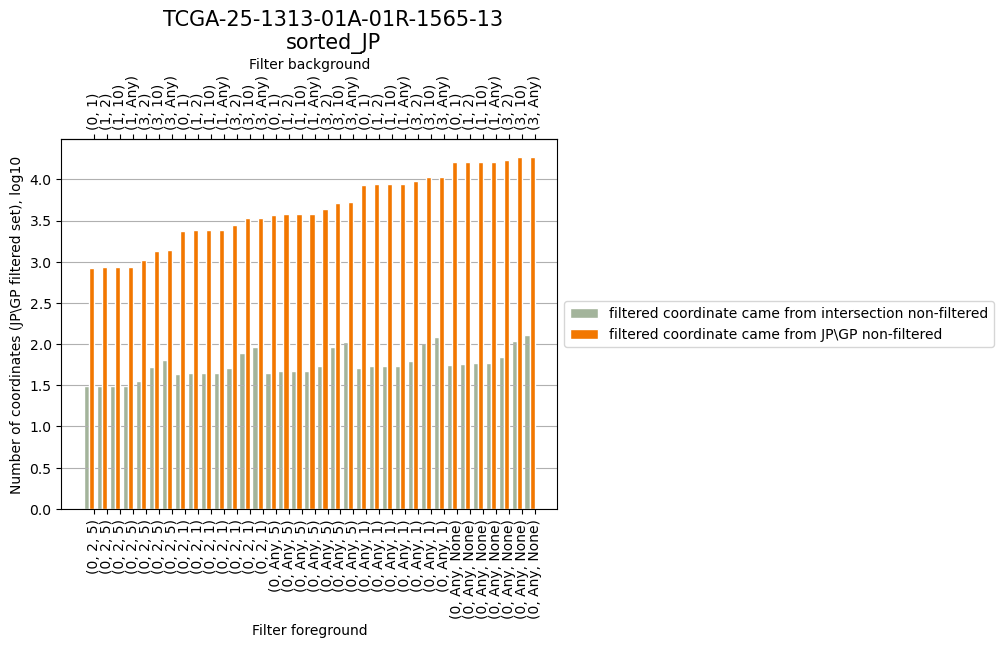

<Figure size 1600x1000 with 0 Axes>

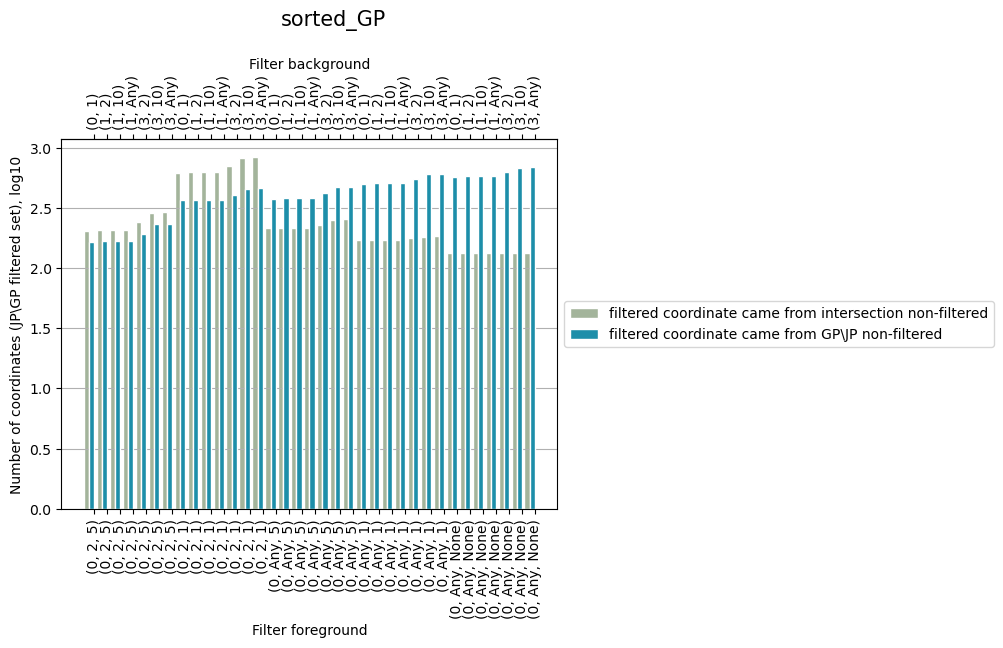

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 1600x1000 with 0 Axes>

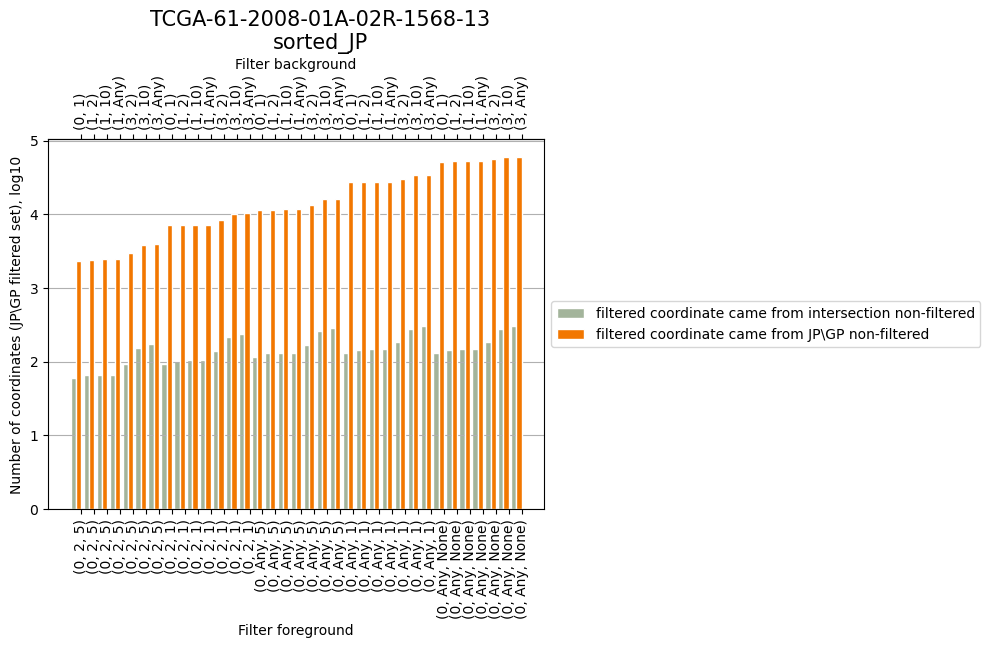

<Figure size 1600x1000 with 0 Axes>

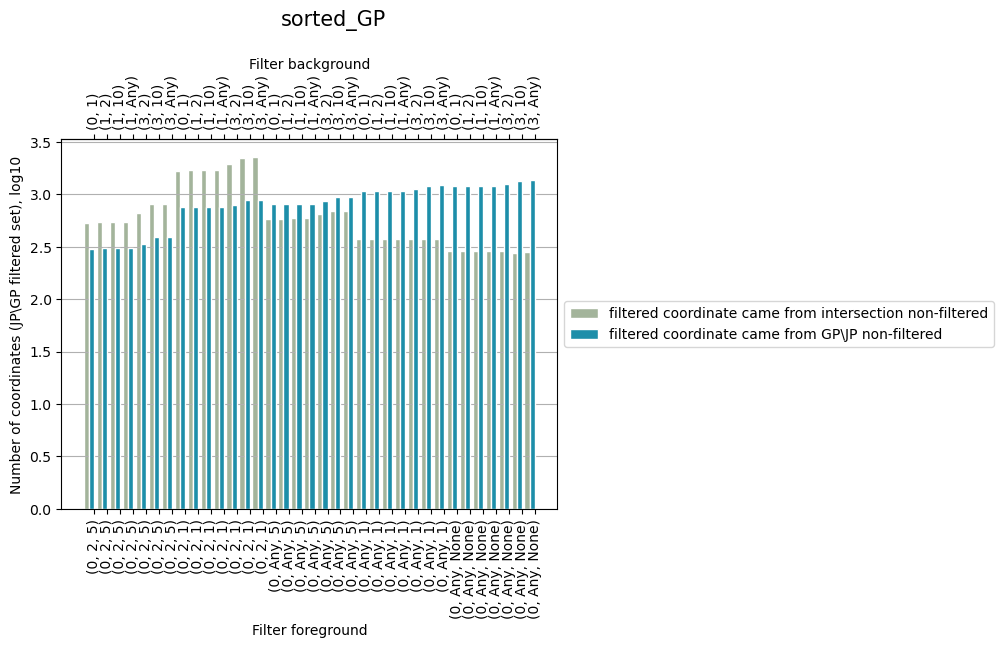

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 1600x1000 with 0 Axes>

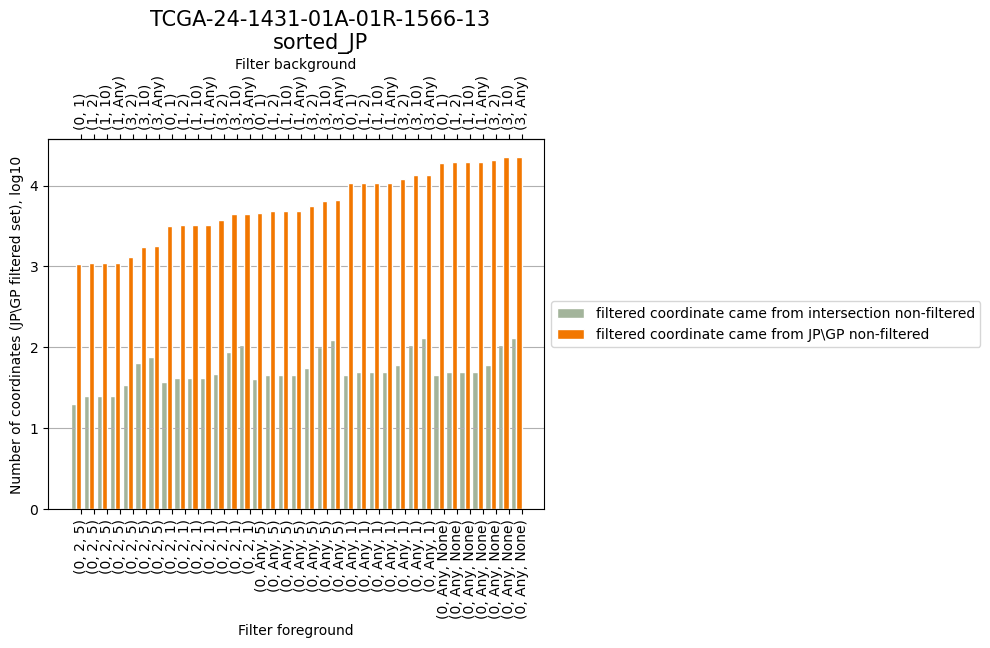

<Figure size 1600x1000 with 0 Axes>

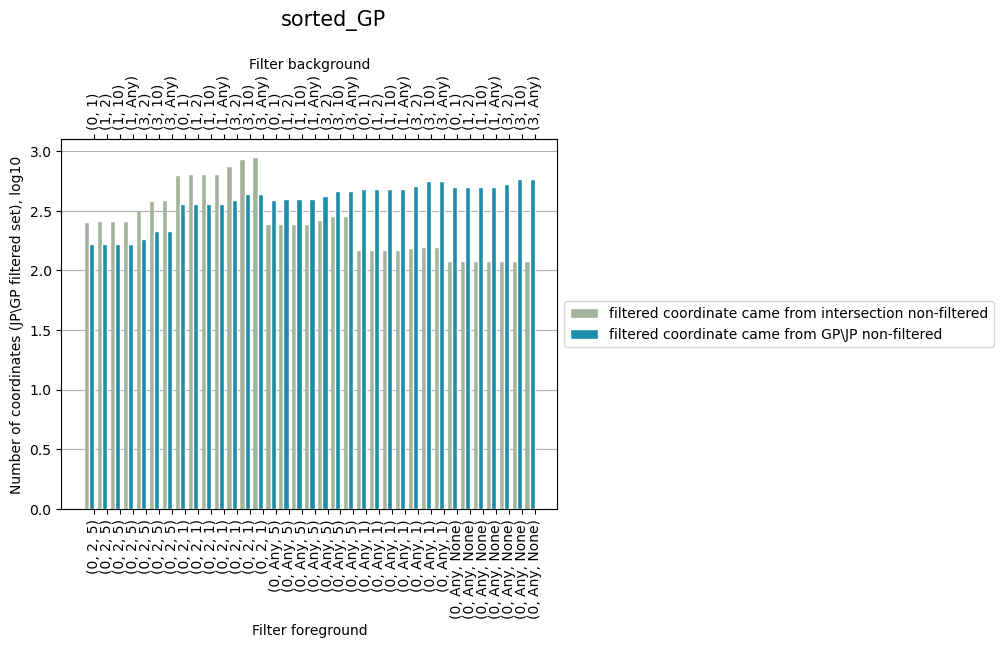

/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreground_pattern']  = [i[0:3] for i in df['filter'].values]
/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/functions/table_processing.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['background_pattern']  = [i[3:5] for i in df['filter'].values]
/cluster/customapps/biomed/grlab/users/p

<Figure size 1600x1000 with 0 Axes>

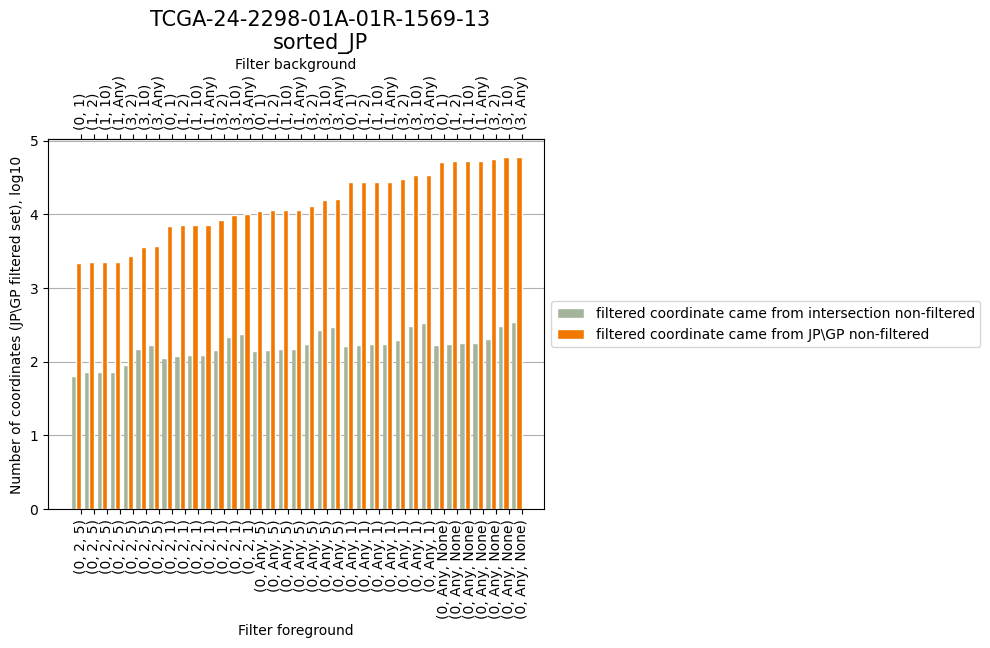

<Figure size 1600x1000 with 0 Axes>

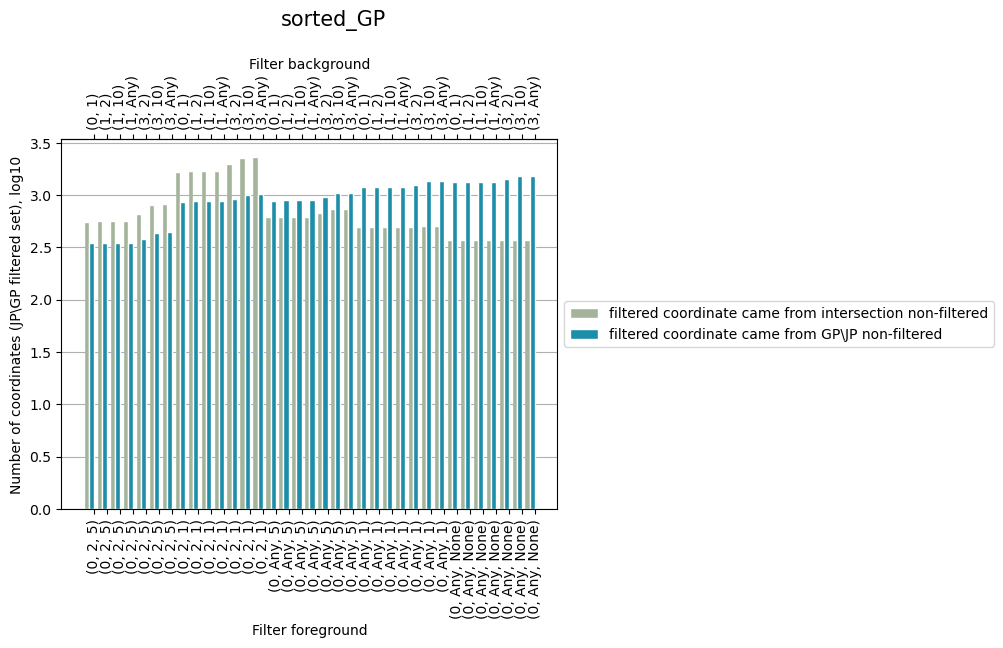

In [17]:
restricts = diff_tab['sample'].unique()
for sample in RESTRICTS_OVARIAN:
    samples_table = diff_tab.loc[diff_tab['sample']==sample]

    
    table_JP=samples_table 
    table_GP=samples_table 
#     table_JP=table_processing.sorting_JP(table_JP)
#     table_GP=table_processing.sorting_GP(table_GP)
    table_JP = table_processing.sort_filters(table_JP, order_background, order_foreground)
    table_GP = table_processing.sort_filters(table_GP, order_background, order_foreground)

    
    FILTER_JP=table_JP['filter']
    FILTER_GP=table_GP['filter']

    
    JP_INTER_NF=np.log10(table_JP['JP from Inter NF'])
    JP_JP_NF=np.log10(table_JP['JP from JP NF'])
    GP_INTER_NF=np.log10(table_GP['GP from Inter NF'])
    GP_GP_NF=np.log10(table_GP['GP from GP NF'])

    
    FF_JP=table_JP['ff']
    FB_JP=table_JP['fb']
    FF_GP=table_GP['ff']
    FB_GP=table_GP['fb']

    
    bar_position_JP=range(len(FF_JP))
    bar_position_GP=range(len(FF_GP))

    
    path_sample_JP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords', sample + '_' + PLOT_TYPE,PLOT_JP_SORT_BY,LOGTHM, NAME_PLOT_JP+PNG])
    path_sample_JP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',sample + '_' + PLOT_TYPE,PLOT_JP_SORT_BY,LOGTHM, NAME_PLOT_JP+PDF])
    path_sample_GP =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',sample + '_' + PLOT_TYPE,PLOT_GP_SORT_BY,LOGTHM, NAME_PLOT_GP+PNG])
    path_sample_GP_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_OVARIAN,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'coords',sample + '_' + PLOT_TYPE,PLOT_GP_SORT_BY,LOGTHM, NAME_PLOT_GP+PDF])

    draw_plot.plotting_JP_GP(FILTER_JP,JP_INTER_NF,JP_JP_NF,sample,bar_position_JP,FF_JP,FB_JP,path_sample_JP,path_sample_JP_pdf,ySalt=', log10')
    draw_plot.plotting_JP_GP(FILTER_GP,GP_INTER_NF,GP_GP_NF,sample,bar_position_GP,FF_GP,FB_GP,path_sample_GP,path_sample_GP_pdf,JP=False,ySalt=', log10')
 